In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [8]:
titanic_data = pd.read_csv(r'\Users\pooja\Downloads\archive\Titanic-Dataset.csv')


In [9]:
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)


In [12]:
titanic_data.drop(columns=['Cabin'], inplace=True)


In [13]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


In [14]:
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 1, 'female': 0})


In [15]:
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)


In [16]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1


In [17]:
titanic_data['IsAlone'] = (titanic_data['FamilySize'] == 1).astype(int)


In [18]:
titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)


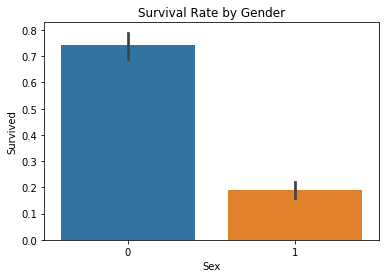

In [19]:
sns.barplot(x='Sex', y='Survived', data=titanic_data)
plt.title('Survival Rate by Gender')
plt.show()


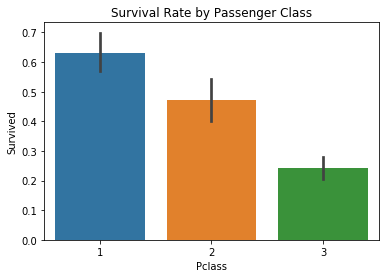

In [20]:
sns.barplot(x='Pclass', y='Survived', data=titanic_data)
plt.title('Survival Rate by Passenger Class')
plt.show()


In [22]:
X = titanic_data.drop(columns=['Survived'])
y = titanic_data['Survived']


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)


In [25]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)


In [26]:
forest = RandomForestClassifier(random_state=42, n_estimators=100)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)


In [27]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


Logistic Regression:
Accuracy: 0.7932960893854749
             precision    recall  f1-score   support

          0       0.80      0.86      0.83       105
          1       0.78      0.70      0.74        74

avg / total       0.79      0.79      0.79       179



In [28]:
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Decision Tree:
Accuracy: 0.7821229050279329
             precision    recall  f1-score   support

          0       0.82      0.80      0.81       105
          1       0.73      0.76      0.74        74

avg / total       0.78      0.78      0.78       179



In [29]:
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))


Random Forest:
Accuracy: 0.8212290502793296
             precision    recall  f1-score   support

          0       0.84      0.86      0.85       105
          1       0.79      0.77      0.78        74

avg / total       0.82      0.82      0.82       179



In [30]:
from sklearn.metrics import accuracy_score

# For Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

# For Decision Tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", accuracy_tree)

# For Random Forest
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("Random Forest Accuracy:", accuracy_forest)


Logistic Regression Accuracy: 0.7932960893854749
Decision Tree Accuracy: 0.7821229050279329
Random Forest Accuracy: 0.8212290502793296
